In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv")

In [3]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [5]:
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [6]:
# Vamos obter algumas estatísticas sobre os dados
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [7]:
# session_id é apenas um registro com os incidentes, vamos nos livrar dessa coluna
df = df.drop(columns=['session_id'], axis=1)

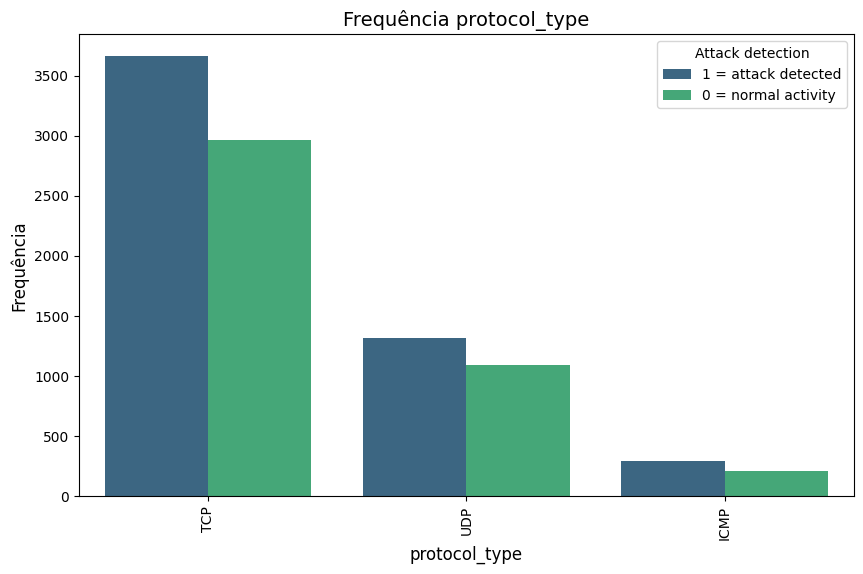

Frequência da coluna protocol_type:
  protocol_type  attack_detected  Frequência
0          ICMP                0         298
1          ICMP                1         209
2           TCP                0        3661
3           TCP                1        2963
4           UDP                0        1314
5           UDP                1        1092


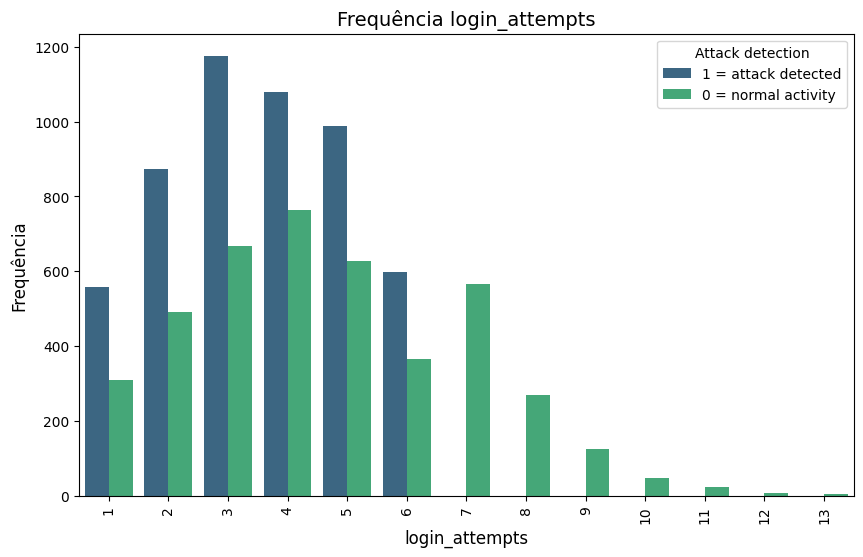

Frequência da coluna login_attempts:
    login_attempts  attack_detected  Frequência
0                1                0         559
1                1                1         309
2                2                0         872
3                2                1         491
4                3                0        1176
5                3                1         668
6                4                0        1080
7                4                1         763
8                5                0         987
9                5                1         627
10               6                0         599
11               6                1         365
12               7                1         567
13               8                1         268
14               9                1         124
15              10                1          47
16              11                1          22
17              12                1           8
18              13                1           5


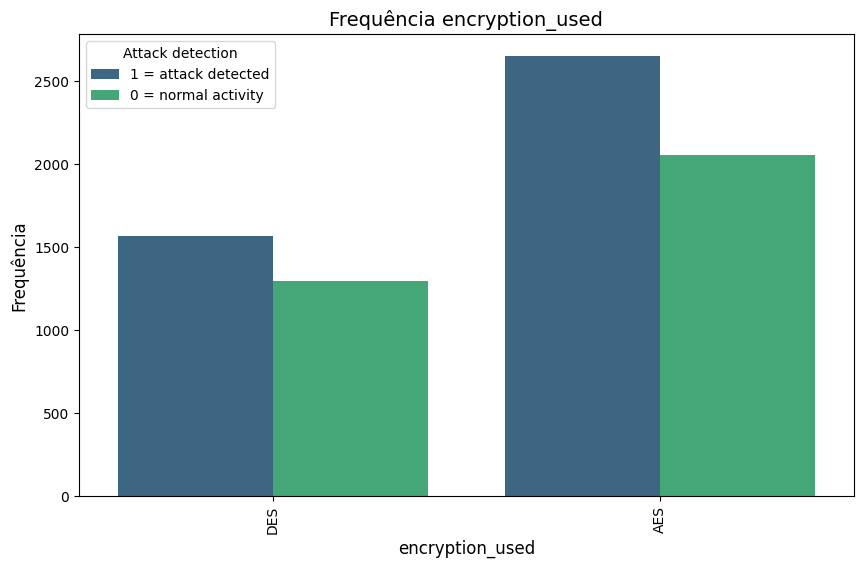

Frequência da coluna encryption_used:
  encryption_used  attack_detected  Frequência
0             AES                0        2651
1             AES                1        2055
2             DES                0        1566
3             DES                1        1299


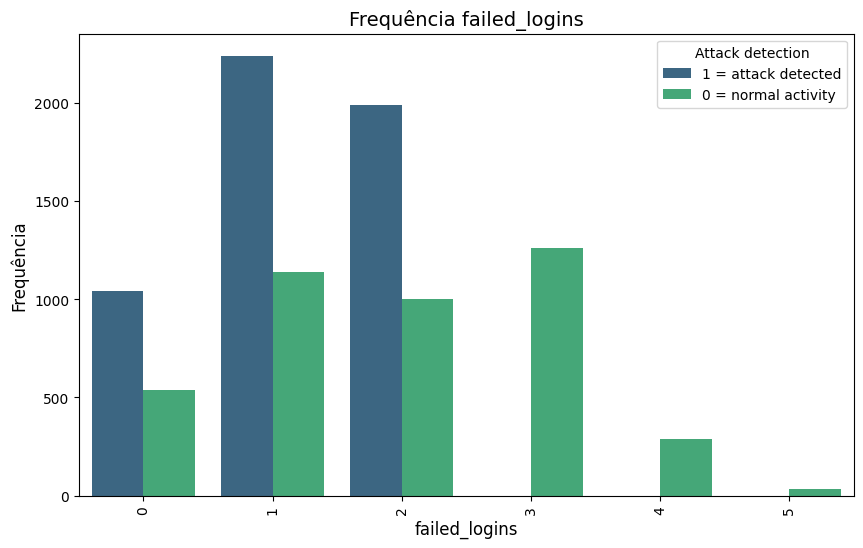

Frequência da coluna failed_logins:
   failed_logins  attack_detected  Frequência
0              0                0        1042
1              0                1         536
2              1                0        2242
3              1                1        1141
4              2                0        1989
5              2                1        1003
6              3                1        1261
7              4                1         290
8              5                1          33


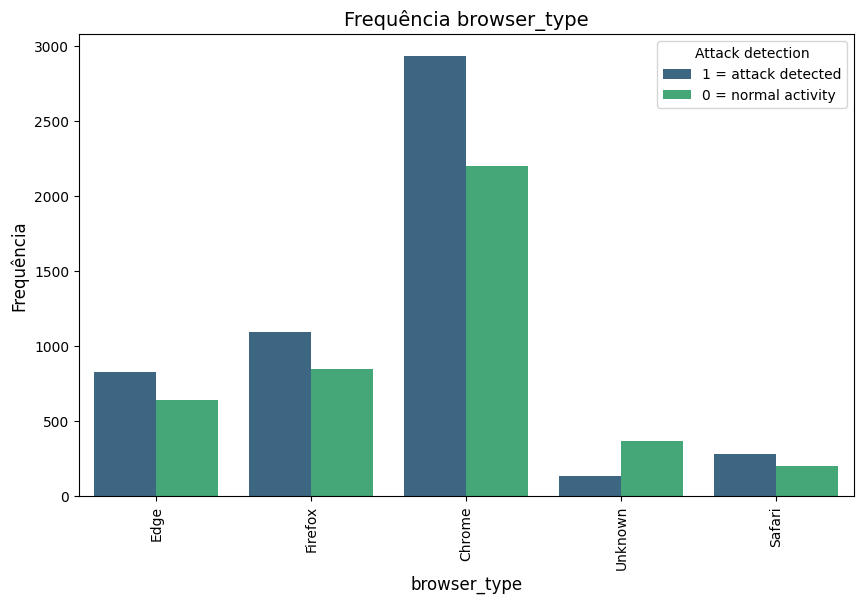

Frequência da coluna browser_type:
  browser_type  attack_detected  Frequência
0       Chrome                0        2935
1       Chrome                1        2202
2         Edge                0         826
3         Edge                1         643
4      Firefox                0        1095
5      Firefox                1         849
6       Safari                0         282
7       Safari                1         203
8      Unknown                0         135
9      Unknown                1         367


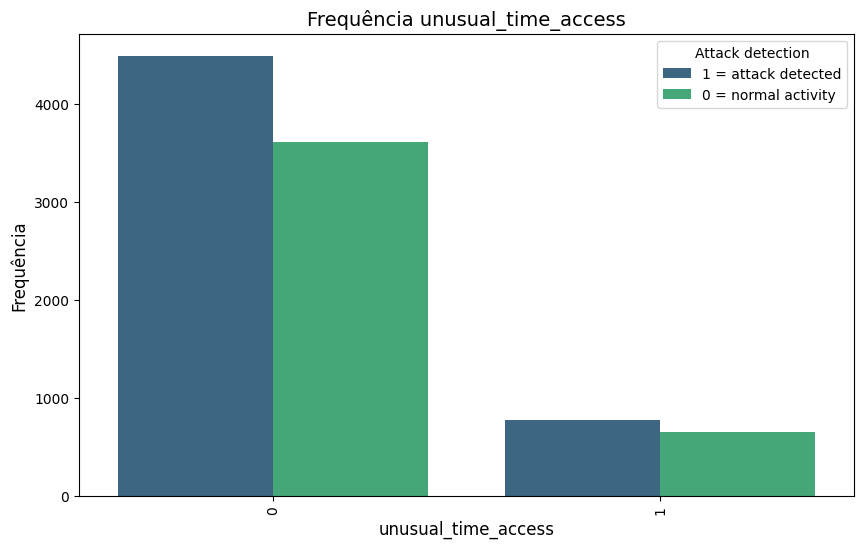

Frequência da coluna unusual_time_access:
   unusual_time_access  attack_detected  Frequência
0                    0                0        4497
1                    0                1        3610
2                    1                0         776
3                    1                1         654


In [8]:
# Itera pelas colunas do DataFrame
for coluna in df.columns:
    if coluna == 'network_packet_size' or coluna == 'session_duration' or coluna == 'ip_reputation_score' or coluna == 'attack_detected':
        continue
    # Cria o gráfico de contagem
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=coluna, hue='attack_detected', palette='viridis')
    plt.title(f'Frequência {coluna}', fontsize=14)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    # Modificar a legenda
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['1 = attack detected', '0 = normal activity']
    plt.legend(handles, labels, title="Attack detection")
    plt.xticks(rotation=90)
    plt.show()
    
    # Conta a frequência dos valores na coluna
    qtd = df.groupby([coluna, 'attack_detected']).size().reset_index(name='Frequência')
    
    # Imprime as frequências
    print(f'Frequência da coluna {coluna}:')
    print(qtd)

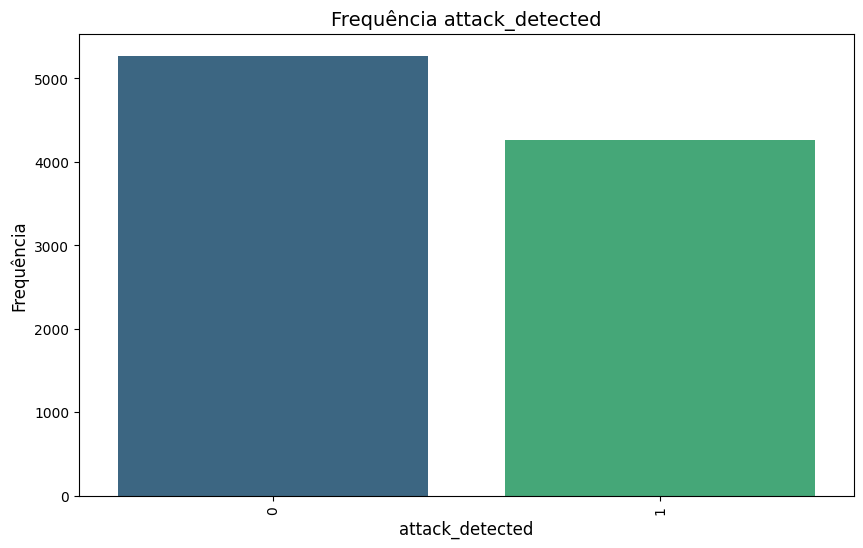

,attack_detected,Frequencia
0,0,5273
1,1,4264


In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='attack_detected', palette='viridis')
plt.title('Frequência attack_detected', fontsize=14)
plt.xlabel('attack_detected', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)
plt.show()
qtd = df['attack_detected'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['attack_detected', 'Frequencia']
qtd

In [10]:
# Como se trata de uma invasão ao sistema a encriptação é vital, vou remover as linhas que tem valores nulos e usar o restante para fazer
df = df.dropna(subset=['encryption_used'])

# ML

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [12]:
X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

label_encoder = LabelEncoder()

col = ['encryption_used', 'protocol_type', 'browser_type']
for coluna in col:
    X[coluna] = label_encoder.fit_transform(X[coluna])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Validação Cruzada (5-fold): {cross_val_scores}")
print(f"Média da Validação Cruzada: {cross_val_scores.mean():.4f}")

Accuracy: 0.8922
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1260
           1       0.99      0.76      0.86      1012

    accuracy                           0.89      2272
   macro avg       0.92      0.88      0.89      2272
weighted avg       0.91      0.89      0.89      2272

Validação Cruzada (5-fold): [0.90231023 0.88110964 0.9002642  0.91083223 0.88969617]
Média da Validação Cruzada: 0.8968
